## Purpose: Etalon fitting example

Demonstration: 
    1. Etalon Model
    2. Unsuccesfull parameter fit when starting from bad initial params
    3. Better starting point finds global minimum.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import EtalonModel
from BayesicFitting import LevenbergMarquardtFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 101
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 2.0, N, dtype=float )
sx = numpy.sin( 6 * x )
ym = 1.3 / ( 1.0 + 0.3 * sx * sx )

y = ym + sig * numpy.random.randn( N )


Define the model

In [4]:
mdl = EtalonModel()

print( mdl )
print( fmt( mdl.parameters ) ) 

Etalon: f( x:p ) = p_0 / ( 1 + p_1 * sin^2( PI * x * p_2 + p_3 ) )
[    1.000    1.000    1.000    0.000]


define the fitter: Fitter

In [5]:
fitter = LevenbergMarquardtFitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    1.083   -0.094    0.982    0.071]
StDevs     : [    0.025    0.033    0.051    0.183]
Chisq      :     2.069
Scale      :     0.146
Evidence   :   -50.399
Covar matrix :
[[    0.001    0.001    0.000    0.000]
 [    0.001    0.001    0.000    0.000]
 [    0.000    0.000    0.003    0.000]
 [    0.000    0.000    0.000    0.033]]


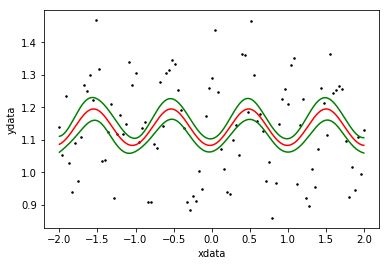

In [7]:
plotFit( x, data=y, model=mdl, fitter=fitter )

That was not very successful. The initial parameters and in particular parameter 2 (the frequency) is not close enough to the real value. The fitter ended in a local minimum.

Try it again starting with an initial frequency of 2. 

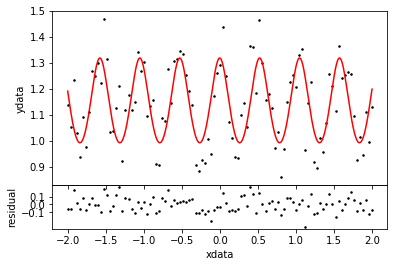

In [8]:
mdl.parameters = [1.0, 1.0, 2.0, 0.0]
param = fitter.fit( y, plot=True )

In [9]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    1.319    0.328    1.905    0.011]
StDevs     : [    0.019    0.032    0.011    0.041]
Chisq      :     0.896
Scale      :     0.096
Evidence   :   -50.838
Covar matrix :
[[    0.000    0.000   -0.000   -0.000]
 [    0.000    0.001    0.000   -0.000]
 [   -0.000    0.000    0.000   -0.000]
 [   -0.000   -0.000   -0.000    0.002]]
